<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Regresión Lineal</span></h1>
<hr>

La regresión lineal es un algoritmo de aprendizaje supervisado que es utilizado para aproximar la relación existente entre una variables dependiente Y, m variables independientes X y un término aleatorio 𝜀 que describe medias o observaciones de ruido y procesos potencialmente no modelados. 

<center>

![Picture title](Ecuation.png)
</center>

Este algoritmo es utilizado principalmente para realizar predicciones en base a datos anteriores, por ejemplo saber en que temporada tendre mayor cantidad de vendas basandome en un registro historico.

A continuación prediciremos el precio de una pizza basandonos en las caracteristicas de esta. El dataset es obtenido de la página de Kaggle, el cual como especifican, es un dataset incompleto, sin embargo puede ser utilizado para aprender y estudiar algorimos de Machine Learning. Para este trabajo utilizaremos la V.1.0 de este dataset y analizaremos que tan eficiente es la regresion lineal para analizar este modelo con los datos obtenidos. Antes de hacer el analisis de nuestros datos e implementación de nuestro modelo, importaremos las librerías a utilizar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
%matplotlib inline

## 1. Analisis y limpieza de datos 

Antes de implementar nuestro modelo, analizaremos y entenderemos con que datos estamos trabajando, para lograr este objetivo, importaremos nuestro dataset y seleccionaremos 10 filas de manera aleatoria. 

In [ ]:
df = pd.read_csv('./Datasets/pizza.csv', encoding='utf-8')
df.sample(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
106,E,"Rp31,000",8.5,mushrooms,classic,small,yes,yes
49,C,"Rp39,000",8.5,tuna,spicy_tuna,small,yes,yes
116,E,"Rp119,000",17.0,mushrooms,new_york,XL,yes,no
83,D,"Rp90,000",12.0,mozzarella,meat_lovers,reguler,yes,yes
74,C,"Rp60,000",12.0,beef,american_classic,medium,yes,no
113,E,"Rp46,000",12.0,mozzarella,classic,medium,yes,yes
101,E,"Rp46,000",12.0,chicken,classic,medium,yes,no
81,D,"Rp70,000",8.0,chicken,meat_lovers,reguler,yes,yes
118,E,"Rp75,000",8.5,smoked beef,classic,small,yes,yes
57,C,"Rp99,000",14.0,sausage,BBQ_sausage,large,no,yes


In [ ]:
df.shape

(129, 8)

Tenemos un dataset que cuenta con 129 ejemplos de pizzas y 8 features. Entre las features tenemos la compañia que es quien produce la pizza, el precio de la pizza el cual se encuentra en rupiah, el diametro de la pizza que se encuentra en libras, la adicion que tiene la pizza, la clase a la que pertenece, el tamaño y por último si tiene salsa extra y queso.

## 1.1. Limpieza de los datos

Ya conocido los datos con los que nos encontramos trabajando, pasamos a hacer una limpieza de nuestros datos, en especial nos enfocaremos en solucionar aquellos datos faltes y duplicados que podrían ocacionarnos problemas al momento de implementar nuestro modelo. 

In [ ]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [ ]:
df[df.duplicated()]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
47,B,"Rp83,000",17.0,chicken,new_york,XL,no,yes
110,E,"Rp115,000",17.0,mozzarella,new_york,XL,no,yes
122,E,"Rp83,000",17.0,chicken,new_york,XL,no,yes


In [ ]:
df = df[~df.duplicated(keep='first')]
df.shape

(126, 8)

Pudimos encontrar que habian 3 filas de datos duplicados, los cuales eliminamos y mantuvimos la primera aparición. A continuación realizaremos un analisis del tipo de dato con el que estamos trabajando.

In [ ]:
df.dtypes

company          object
price_rupiah     object
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

como podemos ver, nuestra variable a predecir se encuentra como un tipo de dato object, además contiene el Rp al inicio que indica la moneda, para hacer nuestra implementación de nuestro modelo, necesitamos que ese dato sea de tipo flotante. A continuación realizaremos la transformación del tipo object a tipo string y despues eliminaremos el Rp al inicio del valor para finalmente transformar el datos a flotante. Una vez que lo tengamos en flotante, realizaremos la transformación de la moneda de ruphian a soles.

In [ ]:
df['price_rupiah'] = df['price_rupiah'].apply(str)
df['price_rupiah'] = df['price_rupiah'].str[2:]
df['price_rupiah']=df['price_rupiah'].str.replace(',','')
df['price_rupiah'] = df['price_rupiah'].apply(float)
df.dtypes

company          object
price_rupiah    float64
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

In [ ]:
def rupiah2soles(x: float)->float:
  return round(x*0.00029,3)

In [ ]:
df['price_rupiah'] = df['price_rupiah'].apply(rupiah2soles)
df.sample(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
5,A,40.60,18.5,black papper,american_favorite,jumbo,no,no
29,B,24.07,17.0,chicken,new_york,XL,no,yes
20,A,66.70,22.0,chicken,double_mix,jumbo,yes,yes
39,B,20.88,14.0,chicken,classic,large,yes,yes
22,A,33.06,14.0,chicken,double_mix,reguler,yes,yes
50,C,20.88,12.0,tuna,spicy_tuna,medium,yes,yes
102,E,20.88,14.0,smoked beef,classic,large,yes,no
77,C,15.66,12.0,tuna,neptune_tuna,medium,yes,yes
123,E,27.84,12.0,mushrooms,double_decker,medium,no,yes
65,C,22.62,12.0,vegetables,gournet_greek,medium,no,no


Queremos que el precio en soles este en la última columna ya que es nuestro target con el que trabajaremos, a continuación realizaremos ese cambio.

In [ ]:
df['price_soles'] = df['price_rupiah']
df = df.drop(['price_rupiah'], axis=1)
df.sample(10)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_soles
36,B,12.0,smoked beef,double_decker,medium,yes,yes,35.67
20,A,22.0,chicken,double_mix,jumbo,yes,yes,66.70
75,C,14.0,beef,american_classic,large,yes,no,28.42
105,E,12.0,chicken,double_decker,medium,no,yes,27.84
116,E,17.0,mushrooms,new_york,XL,yes,no,34.51
121,E,12.0,smoked beef,crunchy,medium,no,yes,14.21
35,B,17.0,mozzarella,new_york,XL,no,yes,33.35
68,C,12.0,vegetables,italian_veggie,medium,no,yes,14.79
93,D,17.0,chicken,new_york,XL,no,yes,24.07
38,B,12.0,mozzarella,classic,medium,yes,yes,13.34


## 1.2.  Preprocesamiento

Para Machine Learning, es más factible trabajar con datos númericos que con datos tipo string, como lo son company, topping, variant, size, extra sauce  y extra cheese. Además podemos ver del resumen de la parte superior que nos ofrece Deepnote que la cantidad de valores unicos que contienen estos son 5, 5, 7, 4, 2 y 2 respectivamente, entonces estos datos pueden ser convertidos a datos categoricos. Estas etiquetas tenemos que codificarlas y obtener de este modo variables númericas tal como se puede ver acontinuación.

In [ ]:
labelEncoder = LabelEncoder()
for _ in df.columns:
  if df[_].dtype == 'object':
    labelEncoder.fit(list(df[_].values))
    df[_] = labelEncoder.transform(df[_].values)
df.sample(10)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_soles
36,1,12.0,9,6,3,1,1,35.67
62,2,12.0,3,12,3,1,1,17.40
111,4,12.0,9,6,3,1,1,35.67
14,0,12.0,4,18,4,0,1,26.10
96,3,12.0,2,4,3,0,1,20.01
84,3,22.0,2,7,1,1,1,66.70
88,3,16.5,2,7,4,1,0,43.21
81,3,8.0,2,13,4,1,1,20.30
8,0,12.0,5,3,4,1,0,26.10
45,1,14.0,4,4,2,1,1,20.88


ya teniendo nuestros datos númericos, podemos hacer un escalamiento de  nuestros datos, para esto utilizaremos el escaliento Z o standar que mátemeticamente se representa como $X_{s} = \frac{x-\mu}{\sigma}$ donde $\mu$ es la mediana y $\sigma$ la varianza.

In [ ]:
for i in df.columns:
    scaler = StandardScaler().fit(df[i].values.reshape(-1,1))
    df[i] = scaler.transform(df[i].values.reshape(-1,1))
df = df.apply(lambda x: round(x,3))
df.sample(10)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_soles
62,-0.017,-0.272,-0.736,0.771,0.045,0.811,0.720,-0.600
12,-1.423,-1.507,1.138,1.925,0.753,0.811,0.720,-0.378
41,-0.720,1.272,-0.112,1.348,-2.079,0.811,-1.389,0.711
35,-0.720,1.272,-0.424,1.348,-2.079,-1.233,0.720,0.622
1,-1.423,2.198,0.513,0.002,-1.371,0.811,0.720,2.467
9,-1.423,-0.272,1.138,-0.960,0.753,-1.233,-1.389,0.067
36,-0.720,-0.272,1.138,-0.383,0.045,0.811,0.720,0.800
22,-1.423,0.346,-1.049,-0.191,0.753,0.811,0.720,0.600
119,1.389,-0.272,-0.112,-0.768,0.045,0.811,0.720,-0.911
118,1.389,-1.353,1.138,-0.768,1.461,0.811,0.720,-0.267


## 1.4. Visualización de los datos

Como se menciono anteriormente en regresión lineal, analizamos la relación existente entre variables de entrada y variables de salida, para que exista esta relación debemos analizar la corelación de nuestros datos y visualizaremos los scatter plot de dos variables ver la correlación existente entre ellas.

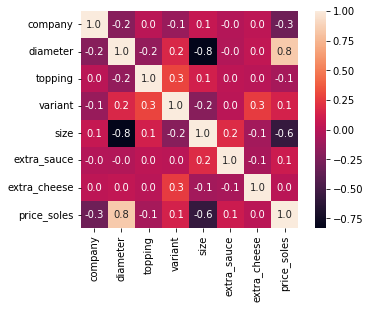

In [ ]:
sns.heatmap(df.corr(), cbar= True, square=True, fmt= '.1f', annot=True);

Despues de analizar la correlación, nos damos cuenta que el precio de la pizza esta fuertemente correlacionado con el diametro de la pizza y el diametro a su vez presenta una gran relación con el tamaño de la pizza. Además podemos ver que el que extra_sauce, extra_cheese, topping y variant presentan una correlación baja con el precio de la pizza. A continuación podemos hacer una visualización de una linea recta que podría relacionar el precio con el diametro

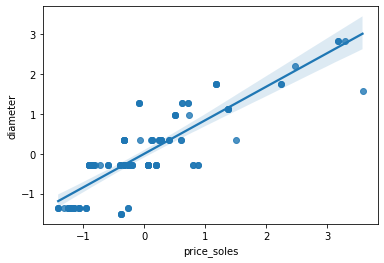

In [ ]:
sns.regplot(x=df.price_soles, y=df.diameter, data=df);

## 2. Implementación del modelo

Del analisis obtenido al hacer una visualización de los datos, deducimos que los valores que más aportan al resultado final son diameter y size. Para la implementación de nuestro modelo, utilizaremos tambien company y veremos los resultados.

### 2.1. Splitting Data

Antes de continuar con la implementación del modelo, copiaremos nuestro DataFrame en una variable X que es la que usaremos para realizar la separación entre nuestros datos de entrenamiento y datos para el testing. Además haremos esta división en un 30% para testing y el resto para el entrenamiento.

In [ ]:
X =df.copy(deep=True)
X = X[['diameter', 'size', 'price_soles']]
X.sample(10)

,diameter,size,price_soles
81,-1.507,0.753,-0.378
13,-0.272,0.753,0.067
29,1.272,-2.079,-0.089
41,1.272,-2.079,0.711
117,-0.272,0.045,0.878
42,-0.272,0.045,0.878
50,-0.272,0.045,-0.333
66,0.346,-0.663,0.400
93,1.272,-2.079,-0.089
74,-0.272,0.045,-0.600


In [ ]:
y = X['price_soles']
X = X.drop('price_soles', axis=1)

In [ ]:
y.sample(5)

114   -0.333
82     0.067
17    -0.378
79     1.178
101   -0.911
Name: price_soles, dtype: float64

In [ ]:
X.sample(5)

,diameter,size
95,-1.353,1.461
26,-0.272,0.045
41,1.272,-2.079
60,0.346,-0.663
83,-0.272,0.753


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=5, shuffle=True)

In [ ]:
print(len(X))
print(len(X_train))
print(len(X_test))

126
88
38


### 2.4. Construcción del modelo

Como se ha venido mencionando a lo largo de nuestro analisis, usaremos com modelo la regresión lineal y para analizar la validación usaremos cross validation y promediaremos el resultado.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
scores = cross_val_score(LinearRegression(),X, y, cv=5, scoring='r2')
scores.mean() 

0.578085457803069

Nuestro modelo presenta una eficiencia de 57% el cual no es muy buen número para poder predecir nuestros resultados y pasarlo a producción, en este punto se pueden realizar dos cosas, volver a analizar nuestros datos y trabajar o crear más features que nos permitan mejorar nuestra precisión, ese proceso es conocido como feature enginer y Scikit learn nos ofrece herramientas para poder hacer este analisís. La otra opción que podemos hacer es recolectar más datos y asi poder tener mejores resultados.

In [ ]:
regressor.coef_

array([1.16205531, 0.38671378])

### 2.3. Error de nuestro modelo

Como paso fnal, analizaremos el error de nuestro modelo usando como metrica el error cuadrático medio. 

In [ ]:
predicciones = regressor.predict(X=X_test)
rms = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
rms

0.4086031282741621

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae02d810-34d9-4474-8459-42c689340f39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>